In [52]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [49]:
cc17do = pd.read_csv('monthly_do_df2017.csv',index_col='DOLocationID')
cc18do = pd.read_csv('monthly_do_df2018.csv',index_col='DOLocationID')

In [50]:
cc_p = pd.concat([cc17do,cc18do],axis=1)

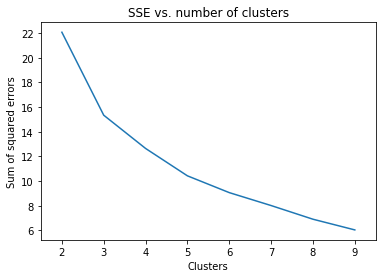

In [61]:
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(cc_p.T)
    SSE.append(res.inertia_)


plt.gca()
plt.plot(range(2,10),SSE)
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.title("SSE vs. number of clusters")
plt.xlim(1.5,9.5)
plt.show()

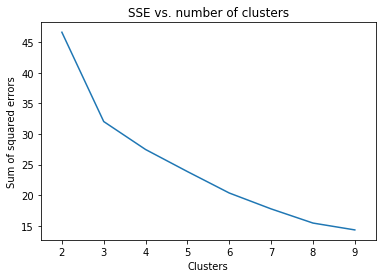

In [53]:
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(cc_p)
    SSE.append(res.inertia_)


plt.gca()
plt.plot(range(2,10),SSE)
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.title("SSE vs. number of clusters")
plt.xlim(1.5,9.5)
plt.show()

In [54]:

kmeans_3 = KMeans(n_clusters=3,random_state=100).fit(cc_p)

In [55]:
cc_p['k3_labels'] = kmeans_3.labels_

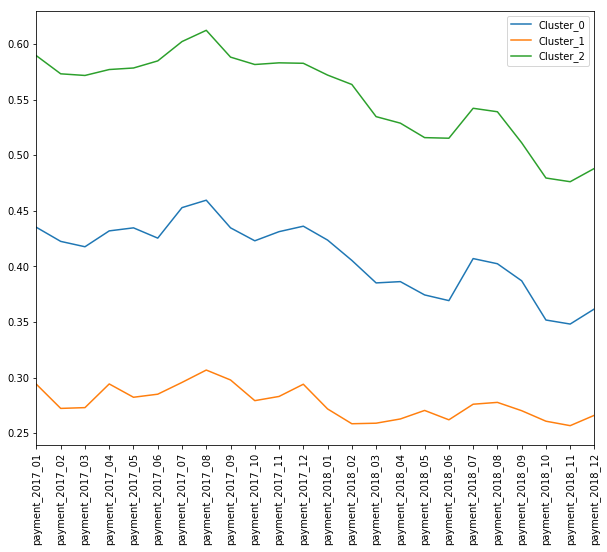

In [67]:
fig,ax = plt.subplots(figsize=(10,8))

cc_p[cc_p['k3_labels']== 0 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_0')
cc_p[cc_p['k3_labels']== 1 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')
cc_p[cc_p['k3_labels']== 2 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2',xticks=[i for i in range(0,24)],rot=90)
plt.legend()

In [69]:
import geopandas as gpd

In [70]:
gdf = gpd.GeoDataFrame.from_file('taxi_zones.shp')

In [72]:
gdf.set_index('OBJECTID',inplace=True)

In [73]:
merged_gdf = gdf.merge(cc_p[['k3_labels']],left_index=True, right_index=True)

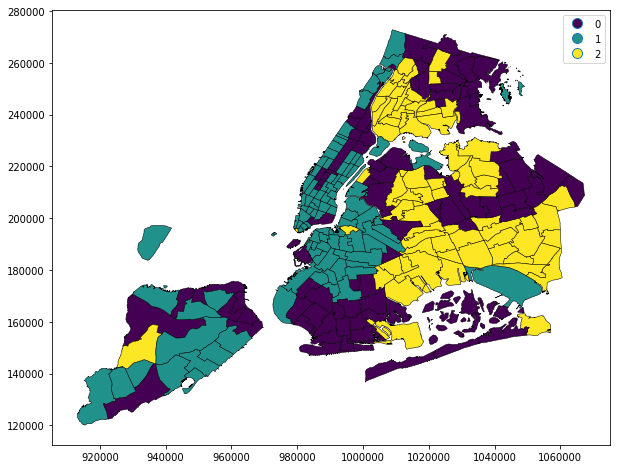

In [76]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='k3_labels',cmap='viridis',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5,categorical=True)


In [120]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# Choose a range of cluster numbers that you would like to evalulate:
range_n_clusters = range(2,10)
Z = linkage(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], 'single')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.6497706184063068
For n_clusters = 3, the average silhouette_score is : 0.6017390900323529
For n_clusters = 4, the average silhouette_score is : 0.6062965635536517
For n_clusters = 5, the average silhouette_score is : 0.47629382648326324
For n_clusters = 6, the average silhouette_score is : 0.4446488763433505
For n_clusters = 7, the average silhouette_score is : 0.4135184157691804
For n_clusters = 8, the average silhouette_score is : 0.4104321548995872
For n_clusters = 9, the average silhouette_score is : 0.38203805542285374


In [127]:
Z = linkage(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], 'single')
cluster_labels_sl=fcluster(Z, 2, criterion='maxclust')   


In [128]:
cc_p['sl_cluster'] = cluster_labels_sl


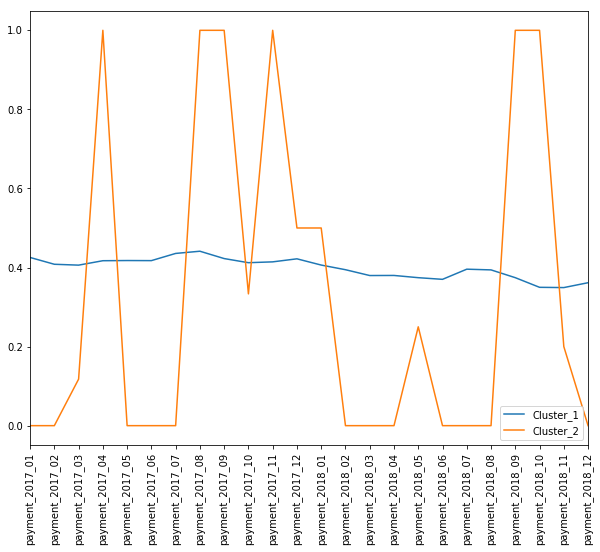

In [129]:
fig,ax = plt.subplots(figsize=(10,8))

cc_p[cc_p['sl_cluster']== 1 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')

cc_p[cc_p['sl_cluster']== 2 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2',xticks=[i for i in range(0,24)],rot=90)
plt.legend()


In [132]:
merged_gdf = gdf.merge(cc_p[['sl_cluster']],left_index=True, right_index=True)

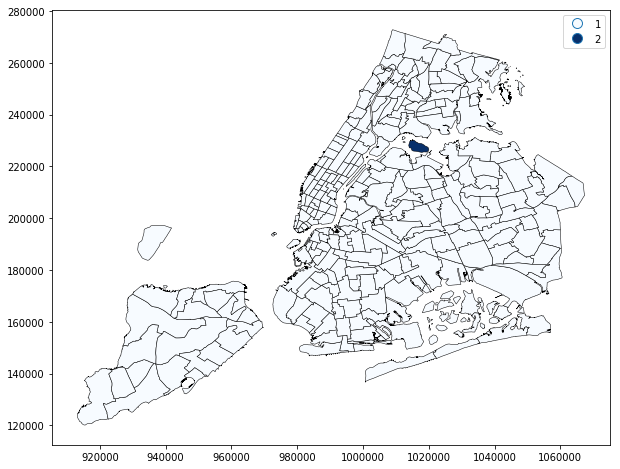

In [133]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='sl_cluster',cmap='Blues',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5,categorical=True)


In [134]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# Choose a range of cluster numbers that you would like to evalulate:
range_n_clusters = range(2,10)
Z = linkage(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], 'complete')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.5100862657460487
For n_clusters = 3, the average silhouette_score is : 0.5085064071754094
For n_clusters = 4, the average silhouette_score is : 0.4969013740770362
For n_clusters = 5, the average silhouette_score is : 0.5039625375871906
For n_clusters = 6, the average silhouette_score is : 0.5109881321610746
For n_clusters = 7, the average silhouette_score is : 0.5166280661888587
For n_clusters = 8, the average silhouette_score is : 0.5216692160475077
For n_clusters = 9, the average silhouette_score is : 0.5282182372942257


In [135]:
Z = linkage(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], 'complete')
cluster_labels=fcluster(Z, 9, criterion='maxclust')   


In [136]:
cc_p['cl_cluster'] = cluster_labels


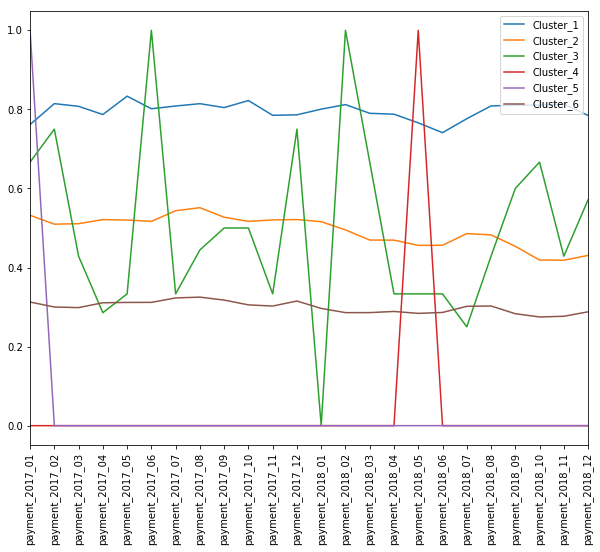

In [137]:
fig,ax = plt.subplots(figsize=(10,8))

cc_p[cc_p['cl_cluster']== 1].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')
cc_p[cc_p['cl_cluster']== 2 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2')
cc_p[cc_p['cl_cluster']== 3 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_3')
cc_p[cc_p['cl_cluster']== 4 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_4')
cc_p[cc_p['cl_cluster']== 5 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_5')
cc_p[cc_p['cl_cluster']== 6 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_6',xticks=[i for i in range(0,24)],rot=90)
plt.legend()


In [138]:
merged_gdf = gdf.merge(cc_p[['cl_cluster']],left_index=True, right_index=True)

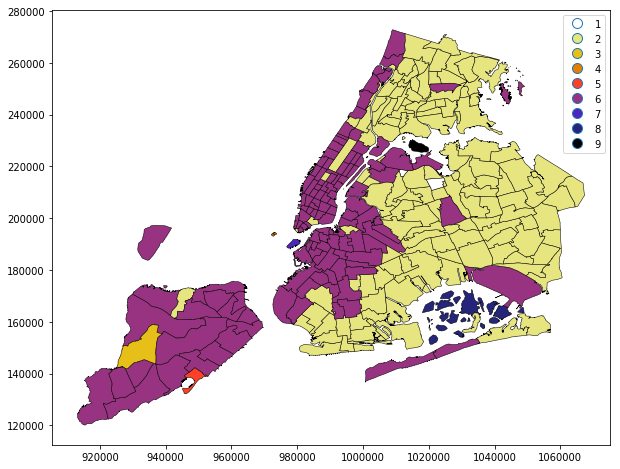

In [139]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='cl_cluster',cmap='CMRmap_r',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5,categorical=True)


In [119]:
import sklearn.mixture as sm
from scipy import linalg
import matplotlib as mpl

In [140]:
n_components = np.arange(2,10)
models = [sm.GMM(n, covariance_type='full', random_state=0).fit(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])
          for n in n_components]

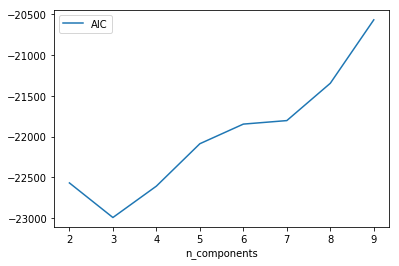

In [141]:
plt.plot(n_components, [m.aic(cc_p.loc[:,"payment_2017_01":"payment_2018_12"]) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [143]:
labels_gmm = sm.GMM(3, covariance_type='full', random_state=0).fit(cc_p.loc[:,"payment_2017_01":"payment_2018_12"]).predict(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])

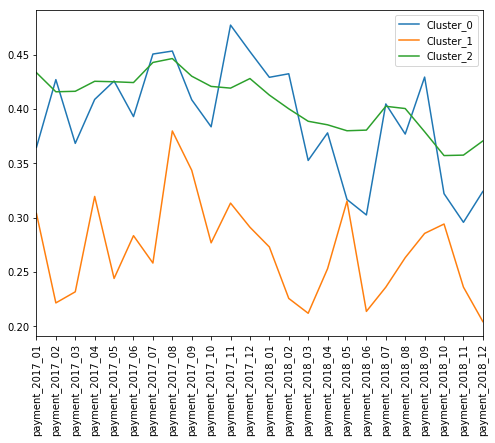

In [146]:
cc_p['gmm_labels'] = labels_gmm
fig,ax = plt.subplots(figsize=(8,6))
cc_p[cc_p['gmm_labels']==0].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_0')
cc_p[cc_p['gmm_labels']==1].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')
cc_p[cc_p['gmm_labels']==2].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2',xticks=[i for i in range(0,24)],rot=90)

plt.legend()

In [147]:
merged_gdf = gdf.merge(cc_p[['gmm_labels']],left_index=True, right_index=True)

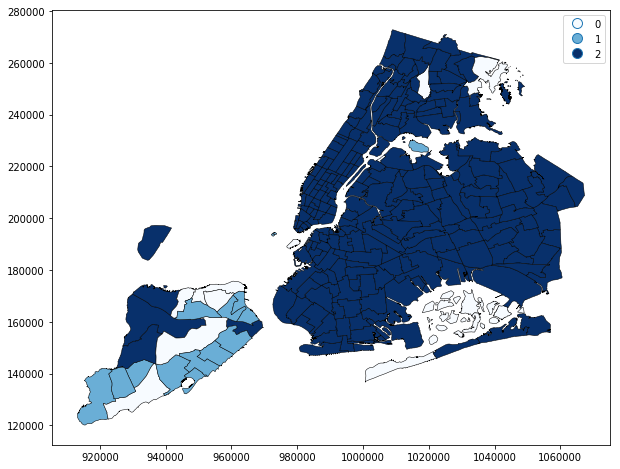

In [149]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='gmm_labels',cmap='Blues',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5,categorical=True)
